In [3]:
import pandas as pd
df = pd.read_excel("Trabajo5.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76936 entries, 0 to 76935
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   FECHA_DESEMBOLSO      76936 non-null  datetime64[ns]
 1   PRODUCTO              76936 non-null  object        
 2   DEPARTAMENTO          76936 non-null  object        
 3   PROVINCIA             76936 non-null  object        
 4   DISTRITO              76936 non-null  object        
 5   IFI                   76936 non-null  object        
 6   TIPO_IFI              76936 non-null  object        
 7   MONTO_CREDITO         76936 non-null  float64       
 8   MONTO_CUOTA_INICIAL   76936 non-null  float64       
 9   PLAZOS                76936 non-null  int64         
 10  TASA                  76936 non-null  float64       
 11  MONTO_VALOR_VIVIENDA  76936 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(6)
memory usage: 7.0+ M

In [5]:
# Verificar si hay algún valor nulo en todo el DataFrame
print(df.isnull().values.any())

False


In [12]:
# Resumen estadístico básico
df.describe()

,FECHA_DESEMBOLSO,MONTO_CREDITO,MONTO_CUOTA_INICIAL,PLAZOS,TASA,MONTO_VALOR_VIVIENDA
count,76936,76936.000000,76936.000000,76936.000000,76936.000000,76936.000000
mean,2021-08-06 04:22:33.602994688,154046.457139,32770.004713,202.965335,9.818292,205066.663951
min,2018-01-04 00:00:00,4000.000000,0.000000,0.000000,5.000000,42500.000000
25%,2019-11-07 00:00:00,82100.000000,16000.000000,168.000000,8.450000,127103.435000
50%,2021-10-13 00:00:00,134500.000000,27090.725000,240.000000,9.210000,186579.115000
75%,2023-02-27 00:00:00,219306.450000,42592.462500,240.000000,10.320000,276202.500000
max,2024-12-30 00:00:00,431370.000000,334420.380000,300.000000,25.000000,479300.000000
std,NaN,91125.856232,24376.629711,61.580019,2.219365,97607.676034


In [8]:
# Media (promedio)
print("Media:")
print(df.mean(numeric_only=True))

# Mediana
print("\nMediana:")
print(df.median(numeric_only=True))

# Moda (valor más frecuente)
print("\nModa:")
for column in df.select_dtypes(include=['object']).columns:
    print(f"\nModa de {column}:")
    try:
        print(df[column].mode().iloc[0])
    except IndexError:
        print("No hay moda para esta columna.")

Media:
MONTO_CREDITO           154046.457139
MONTO_CUOTA_INICIAL      32770.004713
PLAZOS                     202.965335
TASA                         9.818292
MONTO_VALOR_VIVIENDA    205066.663951
dtype: float64

Mediana:
MONTO_CREDITO           134500.000
MONTO_CUOTA_INICIAL      27090.725
PLAZOS                     240.000
TASA                         9.210
MONTO_VALOR_VIVIENDA    186579.115
dtype: float64

Moda:

Moda de PRODUCTO:
NCMV

Moda de DEPARTAMENTO:
LIMA

Moda de PROVINCIA:
LIMA

Moda de DISTRITO:
COMAS

Moda de IFI:
CREDITO

Moda de TIPO_IFI:
BANCO


In [10]:
# Desviación estándar
print("Desviación estándar:")
print(df.select_dtypes(include=['number']).std()) # Only calculate for numeric columns

# Varianza
print("\nVarianza:")
print(df.select_dtypes(include=['number']).var()) # Only calculate for numeric columns

# Rango (máximo - mínimo)
print("\nRango:")
print(df.select_dtypes(include=['number']).max() - df.select_dtypes(include=['number']).min()) # Only calculate for numeric columns

# Rango intercuartílico (IQR)
print("\nRango intercuartílico (IQR):")
print(df.select_dtypes(include=['number']).quantile(0.75) - df.select_dtypes(include=['number']).quantile(0.25)) # Only calculate for numeric columns


Desviación estándar:
MONTO_CREDITO           91125.856232
MONTO_CUOTA_INICIAL     24376.629711
PLAZOS                     61.580019
TASA                        2.219365
MONTO_VALOR_VIVIENDA    97607.676034
dtype: float64

Varianza:
MONTO_CREDITO           8.303922e+09
MONTO_CUOTA_INICIAL     5.942201e+08
PLAZOS                  3.792099e+03
TASA                    4.925581e+00
MONTO_VALOR_VIVIENDA    9.527258e+09
dtype: float64

Rango:
MONTO_CREDITO           427370.00
MONTO_CUOTA_INICIAL     334420.38
PLAZOS                     300.00
TASA                        20.00
MONTO_VALOR_VIVIENDA    436800.00
dtype: float64

Rango intercuartílico (IQR):
MONTO_CREDITO           137206.4500
MONTO_CUOTA_INICIAL      26592.4625
PLAZOS                      72.0000
TASA                         1.8700
MONTO_VALOR_VIVIENDA    149099.0650
dtype: float64


In [14]:
# Cuartiles
print("Cuartiles:")
print(df.select_dtypes(include=['number']).quantile([0.25, 0.5, 0.75]))

# Percentil específico (ej. percentil 90)
print("\nPercentil 90:")
print(df.select_dtypes(include=['number']).quantile(0.90))


Cuartiles:
      MONTO_CREDITO  MONTO_CUOTA_INICIAL  PLAZOS   TASA  MONTO_VALOR_VIVIENDA
0.25       82100.00           16000.0000   168.0   8.45            127103.435
0.50      134500.00           27090.7250   240.0   9.21            186579.115
0.75      219306.45           42592.4625   240.0  10.32            276202.500

Percentil 90:
MONTO_CREDITO           287818.5
MONTO_CUOTA_INICIAL      64140.0
PLAZOS                     240.0
TASA                        13.5
MONTO_VALOR_VIVIENDA    343900.0
Name: 0.9, dtype: float64


In [17]:
import plotly.express as px

fig = px.histogram(df, x="MONTO_CREDITO", title="Histograma de Monto de Crédito")
fig.show()

In [18]:
fig = px.scatter(df, x="MONTO_CREDITO", y="PLAZOS", title="Diagrama de dispersión")
fig.show()

In [19]:
fig = px.box(df, y="TASA", title="Gráfico de caja de Tasa")
fig.show()

In [24]:
# prompt: grafico con plotly sobre tasa por ifi en un top 10, proporcionale colores respectivamente


# Suponiendo que 'IFI' es la columna con el nombre de la institución financiera
# y 'TASA' es la columna con la tasa.
# Ajusta los nombres de las columnas si es necesario.

# Calcula el top 10 de IFIs por tasa promedio
top_10_ifi = df.groupby('IFI')['TASA'].mean().sort_values(ascending=False).head(10)

# Crea un DataFrame para el gráfico
df_top_10 = pd.DataFrame({'IFI': top_10_ifi.index, 'TASA': top_10_ifi.values})

# Define una lista de colores (asegúrate de tener suficientes colores para el top 10)
colores = px.colors.qualitative.Plotly + px.colors.qualitative.Pastel + px.colors.qualitative.Dark24
colores = colores[:10] # Toma solo los primeros 10 colores

# Crea el gráfico de barras con Plotly Express
fig = px.bar(df_top_10,
             x='IFI',
             y='TASA',
             color='IFI', # Asigna colores por IFI
             color_discrete_sequence=colores, # Usa la lista de colores
             title='Top 10 IFIs por Tasa Promedio',
             labels={'IFI': 'Institución Financiera', 'TASA': 'Tasa Promedio'})

fig.update_layout(xaxis_title="Institución Financiera", yaxis_title="Tasa Promedio")
fig.show()


In [25]:
import plotly.express as px



# Agrupa y calcula la tasa promedio

top_10_ifi = df.groupby('IFI')['TASA'].mean().sort_values(ascending=False).head(10).reset_index()



# Crea el gráfico de barras, diferenciando por color

fig = px.bar(

  top_10_ifi,

  x='IFI',

  y='TASA',

  color='IFI', # Color diferente para cada IFI

  title='Top 10 IFIs por Tasa Promedio',

  labels={'IFI': 'Institución Financiera', 'TASA': 'Tasa Promedio'},

  color_discrete_sequence=px.colors.qualitative.Pastel # Puedes elegir otros esquemas de color

)



fig.show()

In [34]:
# Agrupar por mes
monto_desembolso = (
    df
    .groupby(df['FECHA_DESEMBOLSO'].dt.to_period('M'))['MONTO_CREDITO']
    .sum()
    .to_timestamp()
    .reset_index()
    .rename(columns={'FECHA_DESEMBOLSO': 'Fecha', 'MONTO_CREDITO': 'MONTO_CREDITO'})
)

monto_desembolso.set_index('Fecha', inplace=True)


In [35]:
monto_desembolso

,MONTO_CREDITO
Fecha,
2018-01-01,8.432758e+07
2018-02-01,6.403114e+07
2018-03-01,7.745625e+07
2018-04-01,8.466176e+07
2018-05-01,8.654053e+07
...,...
2024-08-01,5.772939e+07
2024-09-01,2.275117e+08
2024-10-01,1.590097e+08


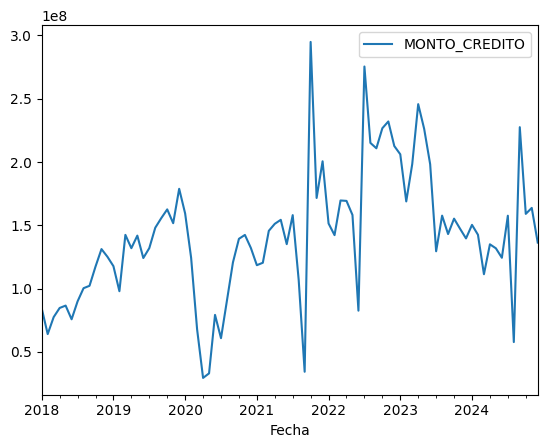

In [36]:
import matplotlib.pyplot as plt
monto_desembolso.plot()
plt.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn9mefxng/pp6hxpao.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn9mefxng/o_w54tgt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77803', 'data', 'file=/tmp/tmpn9mefxng/pp6hxpao.json', 'init=/tmp/tmpn9mefxng/o_w54tgt.json', 'output', 'file=/tmp/tmpn9mefxng/prophet_modelbc20_yx9/prophet_model-20250427011408.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:14:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:14:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages

<Figure size 1200x500 with 0 Axes>

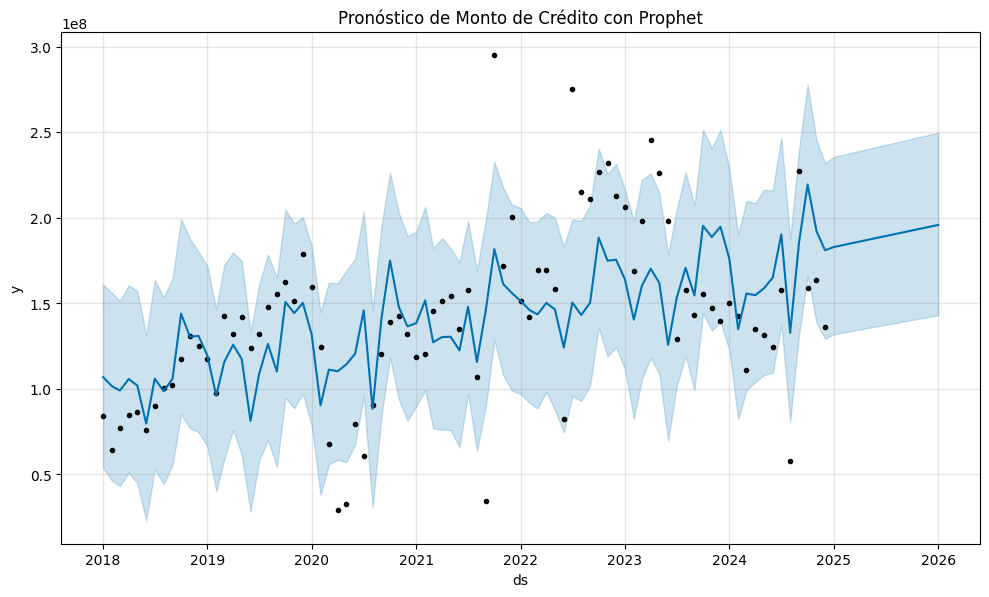

In [46]:
from prophet import Prophet
df_prophet = monto_desembolso.reset_index().rename(columns={'Fecha': 'ds', 'MONTO_CREDITO': 'y'})
modelo_prophet = Prophet()
modelo_prophet.fit(df_prophet)
pronostico = modelo_prophet.make_future_dataframe(periods=2, freq='ys')
pronostico = modelo_prophet.predict(pronostico)
plt.figure(figsize=(12, 5))
modelo_prophet.plot(pronostico)
plt.title("Pronóstico de Monto de Crédito con Prophet")
plt.grid(True)
plt.show()

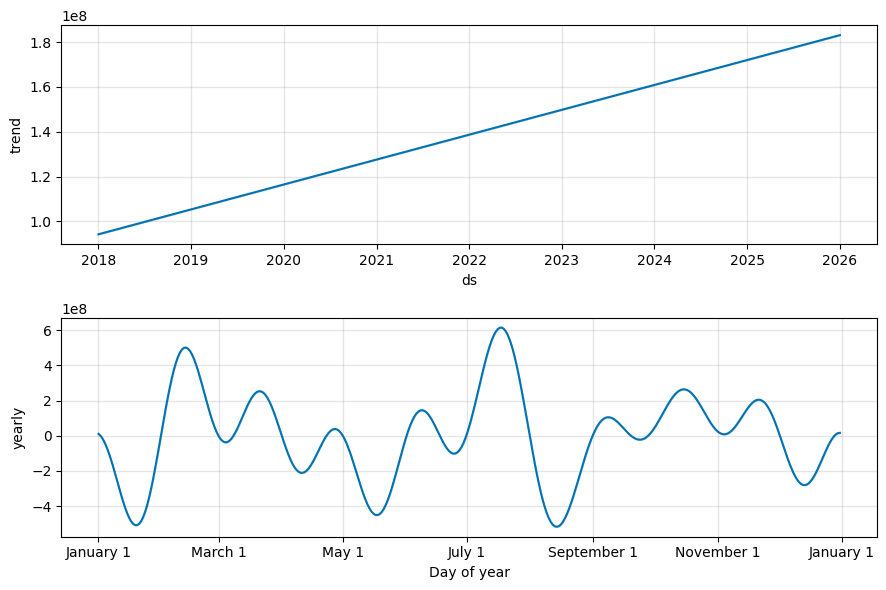

In [47]:
modelo_prophet.plot_components(pronostico)
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



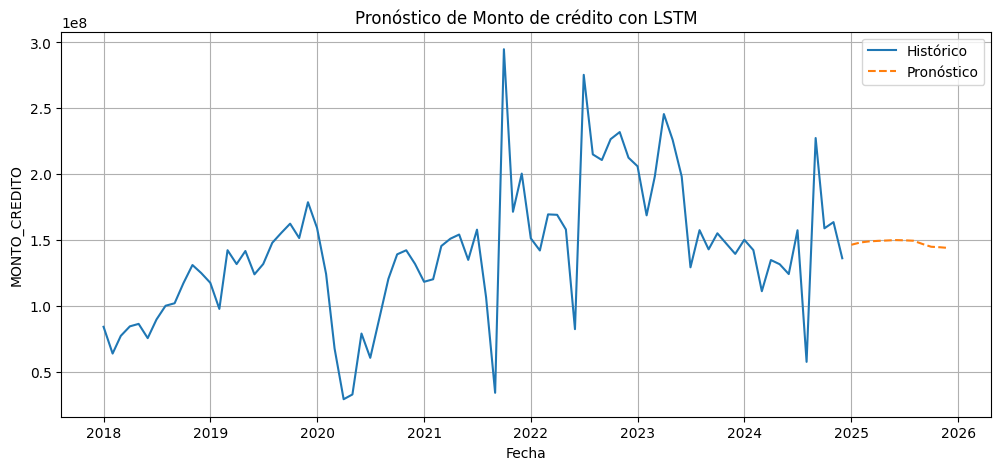

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

monto_desembolso = (
    df
    .groupby(df['FECHA_DESEMBOLSO'].dt.to_period('M'))['MONTO_CREDITO']
    .sum()
    .to_timestamp()
    .reset_index()
    .rename(columns={'FECHA_DESEMBOLSO': 'Fecha', 'MONTO_CREDITO': 'MONTO_CREDITO'})
)

monto_desembolso.set_index('Fecha', inplace=True)


# Escalar los datos
scaler = MinMaxScaler()
ventas_scaled = scaler.fit_transform(monto_desembolso[['MONTO_CREDITO']])

# Crear secuencias de entrada/salida
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

n_steps = 12  # usar 12 meses previos para predecir el siguiente
X, y = create_sequences(ventas_scaled, n_steps)

# Reformatear para LSTM: [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# === Paso 2: Construir la red LSTM ===
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Entrenar el modelo
model.fit(X, y, epochs=100, verbose=0)
x_input = ventas_scaled[-n_steps:].reshape((1, n_steps, 1))

# Predecir los siguientes 12 meses
predictions = []
for _ in range(12):
    yhat = model.predict(x_input, verbose=0)
    predictions.append(yhat[0][0])
    x_input = np.append(x_input[:, 1:, :], [[[yhat[0][0]]]], axis=1)

# Invertir la escala para volver a los valores originales
# Get the last date from the index
last_date = monto_desembolso.index[-1]
future_dates = pd.date_range(start=last_date + pd.offsets.MonthBegin(), periods=12, freq='MS')
forecast_df = pd.DataFrame({'FECHA_DESEMBOLSO': future_dates, 'Pronóstico': scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()}) # Corrected this line

# Graficar
plt.figure(figsize=(12, 5))
# Use monto_desembolso.index for the x-axis
plt.plot(monto_desembolso.index, monto_desembolso['MONTO_CREDITO'], label='Histórico')
plt.plot(forecast_df['FECHA_DESEMBOLSO'], forecast_df['Pronóstico'], label='Pronóstico', linestyle='--')
plt.title("Pronóstico de Monto de crédito con LSTM")
plt.xlabel('Fecha')
plt.ylabel('MONTO_CREDITO')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1312
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0344
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0303
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0372
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0255
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0321
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0259
Epoch 8/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0266
Epoch 9/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0420
Epoch 10/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0374
Epoch 11/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0467
Epoch 12/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0336
Epoch 13/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0335
Epoch 14/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0196
Epoch 15/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0331
Epoch 16/100


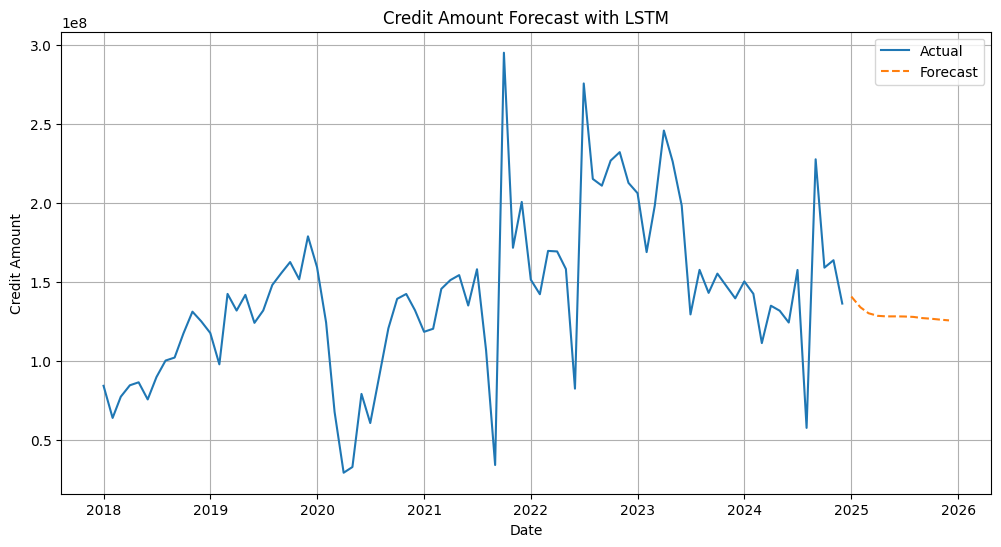

In [57]:
# prompt: modelo de prediccion con machine learning de acuerdo a este cuaderno

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# ... (previous code)

# Forecasting with LSTM (Improvements and explanations)

# Data preprocessing for LSTM
monto_desembolso = (
    df
    .groupby(df['FECHA_DESEMBOLSO'].dt.to_period('M'))['MONTO_CREDITO']
    .sum()
    .to_timestamp()
    .reset_index()
    .rename(columns={'FECHA_DESEMBOLSO': 'Fecha', 'MONTO_CREDITO': 'MONTO_CREDITO'})
)
monto_desembolso.set_index('Fecha', inplace=True)

# Normalize the data (using MinMaxScaler)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(monto_desembolso[['MONTO_CREDITO']])

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data)-seq_length-1):
        x = data[i:(i+seq_length)]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Define sequence length
seq_length = 12  # Use the past 12 months to predict the next one

# Create sequences
X, y = create_sequences(scaled_data, seq_length)

# Reshape for LSTM (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))


# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


# Train the model
model.fit(X, y, epochs=100, batch_size=1, verbose=1) # Increased epochs


# Predict future values
future_predictions = []
input_seq = scaled_data[-seq_length:]
for _ in range(12): # Predict 12 future months
    input_seq_reshaped = input_seq.reshape(1, seq_length, 1)
    pred = model.predict(input_seq_reshaped)
    future_predictions.append(pred[0][0])
    input_seq = np.append(input_seq[1:], pred, axis=0)


# Inverse transform to get original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1,1)).flatten()

# Create a DataFrame for plotting
last_date = monto_desembolso.index[-1]
future_dates = pd.date_range(start=last_date + pd.offsets.MonthBegin(1), periods=12, freq='MS')
forecast_df = pd.DataFrame({'Date': future_dates, 'Prediction': future_predictions})

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(monto_desembolso.index, monto_desembolso['MONTO_CREDITO'], label='Actual')
plt.plot(forecast_df['Date'], forecast_df['Prediction'], label='Forecast', linestyle='--')
plt.title('Credit Amount Forecast with LSTM')
plt.xlabel('Date')
plt.ylabel('Credit Amount')
plt.legend()
plt.grid(True)
plt.show()


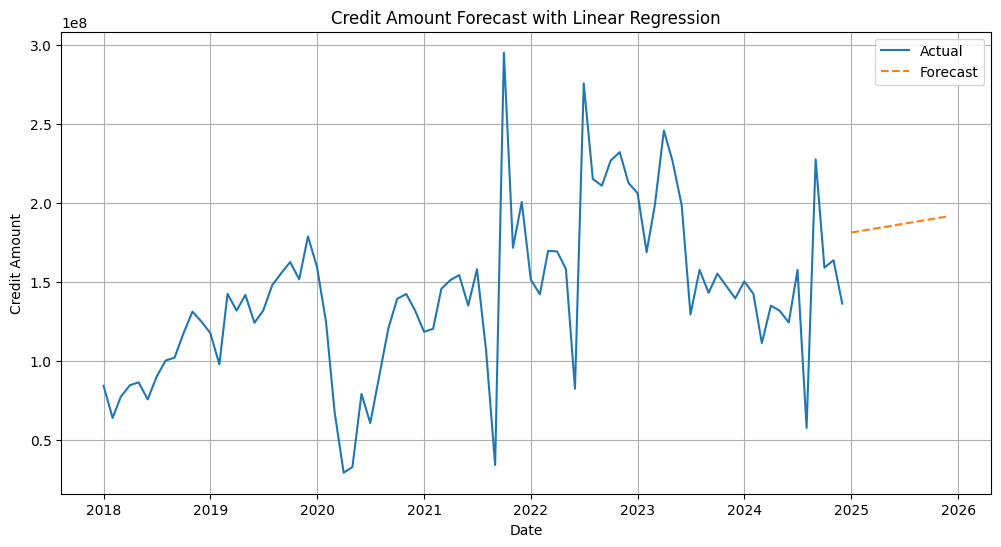

In [58]:
# prompt: que otro modelo de prediccion se puede realizar?

import pandas as pd
import matplotlib.pyplot as plt
# ... (previous code)

from sklearn.linear_model import LinearRegression

# Prepare data for linear regression
monto_desembolso = (
    df
    .groupby(df['FECHA_DESEMBOLSO'].dt.to_period('M'))['MONTO_CREDITO']
    .sum()
    .to_timestamp()
    .reset_index()
    .rename(columns={'FECHA_DESEMBOLSO': 'Fecha', 'MONTO_CREDITO': 'MONTO_CREDITO'})
)
monto_desembolso['Month'] = monto_desembolso['Fecha'].dt.month
monto_desembolso['Year'] = monto_desembolso['Fecha'].dt.year

# Create a numerical representation of the date
monto_desembolso['DateNum'] = monto_desembolso['Fecha'].apply(lambda x: x.toordinal())
monto_desembolso = monto_desembolso.set_index('Fecha')


X = monto_desembolso[['DateNum']]  # Use the numerical date as the predictor
y = monto_desembolso['MONTO_CREDITO']

# Train a linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions for the next 12 months
future_months = pd.date_range(start=monto_desembolso.index[-1] + pd.DateOffset(months=1), periods=12, freq='MS')
future_months_num = [date.toordinal() for date in future_months]
future_X = pd.DataFrame({'DateNum': future_months_num})
predictions = model.predict(future_X)


# Create a DataFrame for plotting
forecast_df = pd.DataFrame({'Date': future_months, 'Prediction': predictions})

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(monto_desembolso.index, monto_desembolso['MONTO_CREDITO'], label='Actual')
plt.plot(forecast_df['Date'], forecast_df['Prediction'], label='Forecast', linestyle='--')
plt.title('Credit Amount Forecast with Linear Regression')
plt.xlabel('Date')
plt.ylabel('Credit Amount')
plt.legend()
plt.grid(True)
plt.show()
